# PYTHON VERSION

In [1]:
import sys
print(sys.version)

# Escape times 

Random walks on $\mathbb{Z}$ and $\mathbb{Z}^2$

In [2]:
import numpy as np
from numpy.random import choice

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)  # default figure size

## Simple Symmetric walk on $\mathbb{Z}$

For the simple symmetric walk on $\mathbb{Z}$ the well-known `simple_markov_chain_lib` library will not be necessary here, a chain from scratch will be implemented.

To implement a Markov chain (at least) 2 things are necessary:

1. A variable to store the current state
2. A "function" to give us the next state, which can depend on the present state and time.

In the following code cell the simple symmetric random walk is implemented for iterations.

In [3]:
np.random.seed(2017)  # for reproducibility

x = 0  # current state of MC
steps = [-1, 1]
probs = [0.5, 0.5]

for n in range(10):
    x += choice(steps, p=probs)  # select 1 step at random
    print(x)
    

-1
0
-1
-2
-1
0
-1
-2
-3
-4


The variable `x` stores the existing state starting from 0. In each iteration one of the 2 possible steps (left or right) is added with equal probability.

The function `choice` picks one of the 2 possible steps (`steps`) with probability (`p=probs`). For the case where all possibilities are equally likely, `p` can be omitted but is added here for completeness. 

In [4]:
# help on 'choice' function
choice?

## Python - Generators

For convenience (and less writing) the walk is implemented as a `generator` function. 
A generator function works like a regular function except that it "remembers" its previous state.

The previous example using a generator is written likewise:

In [5]:
np.random.seed(2017)  # same results are previous run

# random walk generator:
def rand_walk_Z(start = 0, probs = (0.5, 0.5)):
    x = start
    steps = [-1, 1]  # probs order should be (left, right)
    while True:  # continue for ever in needed
        x += choice(steps, p=probs)
        yield x  # it's a generator!

walker = rand_walk_Z()  # start a new markov chain
for n in range(10):
    x = next(walker)  # take 1 step!
    print(x)


-1
0
-1
-2
-1
0
-1
-2
-3
-4


The command

`walker = rand_walk_Z()` 

creates a new chain. The chain is in the initial state and waits to move on.
When we give the command

`x = next(walker)`

Python runs the code until it finds the command **`yield`** and returns the variable x.

A normal function would stop and "disappear" at this point, the next time you call it it would start over. But because of the `yield` keyword Python understands that the `rand_walk_Z` function is not a regular function but a *function generator*!

Therefore, the next time the function is called with `next`, the execution will resume from `yield` (the point where it had stopped). Due to the `yield` definition inside of an *infinite loop* (`while true`) Python will continue to return values no matter how many times the chain is advanced (`next`) (that's why it's called a generator).

### Application: Escape Time from Interval

In this application simulations will be done for the simple symmetric walk to exit an interval $[a,b]$.


The following code cell implements this case and visualizes the result with a time vs position graph for 3 different walks.

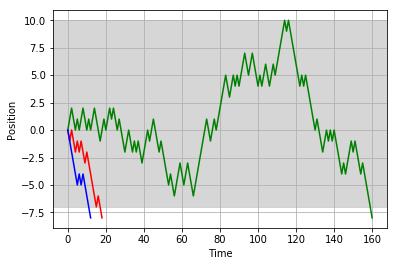

In [6]:
fig, ax = plt.subplots()  # initiate plots

a = -7  # lower boundary
b = 10  # upper boundary

for col in ['red', 'green', 'blue']:  # 3 random walks r-ed, g-reen, b-lue
    walker = rand_walk_Z()  # start new symmetric walk from 0
    x = 0  # start position 0
    chain = [x]  # save positions to plot
    while a <= x <= b:
        x = next(walker)
        chain.append(x)
    ax.plot(chain, color=col)

# To look nicer
plt.axhspan(a, b, color = '#cccccc', alpha = 0.8)  # box between a & b
ax.grid()  # adds grid lines
plt.xlabel('Time')
plt.ylabel('Position')

# Show image!
plt.show()

### Further Information
[Wikipedia - Donsker's invariance principle](https://en.wikipedia.org/wiki/Donsker%27s_theorem)

## Random walk on $\mathbb{Z}^2$

To implement the random walk on $\mathbb{Z}^2$ a new generator function is necessary. In the cell below we give you `rand_walk_Z2`.

The logic is the same as `rand_walk_Z` just this time:

* 2 variables `x, y` are used to determine the position
* `steps` is a list of tables representing the possible shifts
* In each iteration one element of `steps` is picked and added to `x` and `y` respectively.

In [7]:
# random walk in Z^2 generator:
def rand_walk_Z2(start=(0, 0), probs=(0.25, 0.25, 0.25, 0.25)):
    # probs order (left, right, bottom, up)
    x, y = start
    steps = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    while True:
        dx, dy = steps[choice(4, p=probs)]  # choice(4) = choose a number in [0,3]
        x, y = x + dx, y + dy
        yield x, y

## Application: Escape Time from Disk

For familiarization purposes, the simple symmetric walk on $\mathbb{Z}^2$ is implimented until the disk of radius $r = 20$ is abandoned.

The code cell below simulates this chain 3 times.

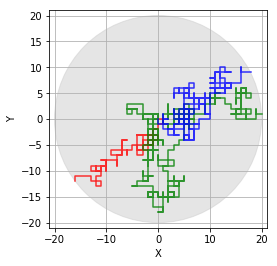

In [8]:
fig, ax = plt.subplots()  # initiate plots

r = 20  # radius of circle boundary
r2 = r**2  # square of radius

for c in 'rgb':  # 3 random walks r-ed, g-reen, b-lue, 1st loop c=r, 2nd loop c=g, 3rd loop c=b 
    x, y = 0, 0  # start position 0
    X, Y = [0], [0]  # store positions
    walker = rand_walk_Z2()  # start new symmetric walk from 0, 0
    while x**2 + y**2 < r2:
        x, y = next(walker)
        X.append(x)
        Y.append(y)
    #X = np.array(X) + np.random.randn(len(X))/3
    #Y = np.array(Y) + np.random.randn(len(Y))/3
    ax.plot(X, Y, color=c, alpha = 0.8)

# To look nicer
circle = plt.Circle((0, 0), r, color="#cccccc", alpha=0.5)
ax.add_artist(circle)  # draw a circle
ax.set_xlim([-r-1, r+1])
ax.set_ylim([-r-1, r+1])
ax.set_aspect('equal')  # set aspect ratio 1:1
ax.grid()  # adds grid lines
plt.xlabel('X')
plt.ylabel('Y')

# To Show image!
plt.show()

The `alpha` parameter makes the lines more transparent to make the areas that the chain has visited multiple times a bit more obvious.

## Application: Output time distribution

Next a simulation of the chain for `N = 1,000` times follows.
For each simulation the time it took for the chain to exit the disk for the first time is stored.

In [9]:
r = 20  # radius of circle boundary
r2 = r**2  # square of radius

N = 1000  # sample size
escape_time = np.zeros(N, dtype=int)  # to store the exit time
for n in range(N):
    walker = rand_walk_Z2()
    x, y = (0, 0)
    t = 0
    while x**2 + y**2 < r2:
        x, y = next(walker)
        t += 1
    escape_time[n] = t

Now that N=1000 random samples of the output time have been created an estimation of its distribution can be given, by plotting the histogram of its values in our sample.

In the code cell below this histogram is plotted by dividing the range of values of `escape_time` into 30 regions (`bin=30`).

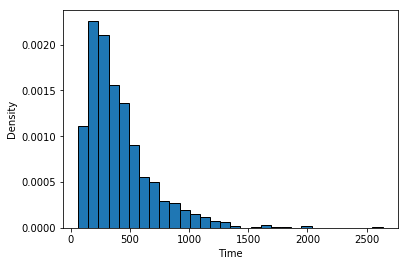

In [10]:
plt.hist(escape_time, bins=30, edgecolor='black', density=True)
plt.xlabel('Time')
plt.ylabel('Density')
plt.show()